# Breast Cancer Wisconsin

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
features = data.filter(regex='_mean', axis=1)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
y = data['diagnosis'].map({"M": 0, "B": 1})

In [10]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

## Dividindo o dataset em conjunto de treino e teste

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
Xtrain, Xval, ytrain, yval = train_test_split(features, y, train_size=.5)

In [14]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((284, 10), (285, 10), (284,), (285,))

## Criando o modelo

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

"""
n_estimators => Número de árvores utlizadas (nº de arvores da floresta).
n_jobs       => Quantos processadores devem ser usados simultaneamente para executar os metodos em paralelo, -1 implica que todo
                o CPU deve ser usado.
random_state => Controle do gerador de numeros aleatórios para cada interação, com 0 a sequencia aleatória permanece a mesma
                para cada interação

"""

modelo = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [25]:
modelo.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Avaliando o modelo

In [26]:
from sklearn.metrics import classification_report

In [77]:
p = modelo.predict(Xval)
print(classification_report(yval, p))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       108
           1       0.92      0.96      0.94       177

    accuracy                           0.92       285
   macro avg       0.92      0.91      0.92       285
weighted avg       0.92      0.92      0.92       285



## Interpretando o Modelo

A biblioteca SHAP foi feita para explicar modelos de Machine Learning e Deep Learning, oferecendo, além de belas visualizações, uma forma de interpretar os outputs do modelo e explicar o que esta acontecendo

In [29]:
import shap

shap.initjs()

In [31]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(Xtrain)

In [32]:
explainer

In [46]:
#O metódo atribui valores para cada uma das features, em cada linha
#O shap_values é um vetor bidmensional por que o modelo prevê duas saídas, assim o método atribui um valor para cada saida
#ou seja, o vetor é bidmensional pois contém a probabilidade de cada feature ser da classe 0 ou 1
shap_values[1].shape

(284, 10)

In [47]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], Xtrain.iloc[1,:])

In [48]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:])

As visualizações acima nos mostram a probabilidade do exemplo pertencer a classe 0 (azul) ou 1(rosa), e a contribuição de cada feature para essa probabilidade, ou seja, podemos ver o quanto cada feature contribuiu para que o modelo tome a decisão de atribuir um exemplo a uma classe, logo podemos identificar as features mais significativas para cada modelo

No gráfico seguinte podemos observar as previsões para os exemplos que temos, além de poder ver a partir de qual valor da feature o modelo ficou convencido da classificação, dentre diversas outras coisas também

In [57]:
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain)

O gráfico a seguir nos mostra as features mais importantes, atribuindo um valor -por feature- para cada amostra, assim vemos quais pontos, e a concentração deles, possuem um valor alto ou baixo que determinará a qual classe ele pertence. Além disso temos no eixo x o impacto na saída do modelo, ou seja, valores mais a direita aumentam as chances de ser Benigno, valores mais a esquerda diminuem as chances de serem Benigno.<br>
Logo podemos também notar as features mais correlacionadas com a chance de ser maligno ou benigno, assim como as features pouco correlacionadas com ou output

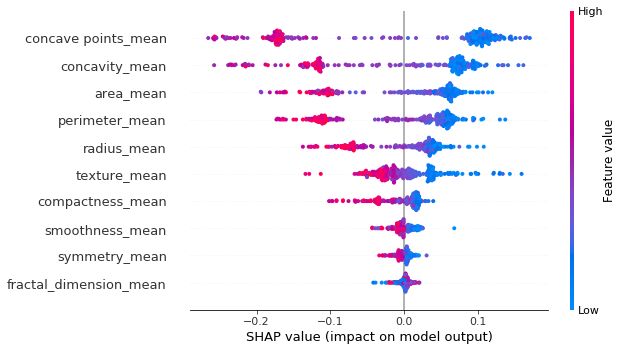

In [58]:
shap.summary_plot(shap_values[1], Xtrain)

O gráfico a seguir nos mostra como varia a contribuição de determinada feature de acordo com o seu valor, ou seja, como o seu valor afeta a decisão do modelo

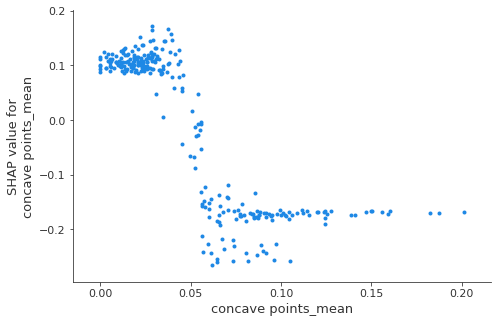

In [62]:
shap.dependence_plot("concave points_mean", shap_values[1], Xtrain, interaction_index=None)

No caso acima podemos ver, por exemplo,  que a chance da asmotra ser um tumor benigno é muito maior quando, a média dos pontos concavos for menor que 0.05

Podemos analisar como que as outras variaveis interagem com essa mais importante(Concave Points Mean) para gerar a previsão

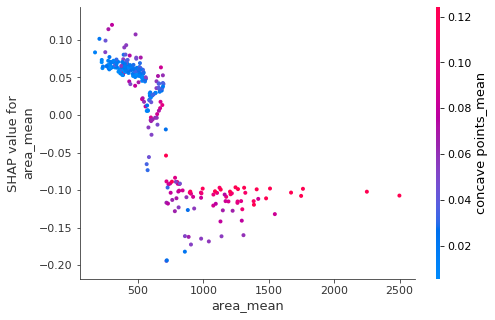

In [67]:
shap.dependence_plot("area_mean", shap_values[1], Xtrain, interaction_index="concave points_mean")

Agora vimos a correlação entre as duas features selecionadas para a chance da amostra ser benigna. Notamos que quando as chances da amostra ser bebigna são altas, temos valores baixos tanto da Area_mean quando do concave points_mean, e ocorre ao contrário para chances baixas de ser benigno